In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

 **Get the train and test data** 

In [0]:
train=pd.read_csv('/content/drive/My Drive/HAR/UCI_HAR_dataset/csv_files/train.csv')
test=pd.read_csv('/content/drive/My Drive/HAR/UCI_HAR_dataset/csv_files/test.csv')

In [0]:
print( "train shape::{}".format(train.shape))
print( "test shape::{}".format(test.shape))

train shape::(7352, 564)
test shape::(2947, 564)


In [0]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [0]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [0]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [0]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

**Function to plot the confusion** 

In [0]:
#function for ploting confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Generic function to run any model specified**

In [0]:
#Generic finction to run any model specified
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    #fitting the model
    model.fit(X_train, y_train)
   
    
    # predict test data
    y_pred = model.predict(X_test)
    print('Done \n \n')
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
   
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

**Generic function to print the GridSerach attributes**

In [0]:
#Method to print the gridsearch Attributes
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [0]:
import sklearn
print('sklearn: %s' % sklearn.__version__)
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

sklearn: 0.21.3


**1. Logistic Regression with Grid Search**

---



Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.3min finished


Done 
 

---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


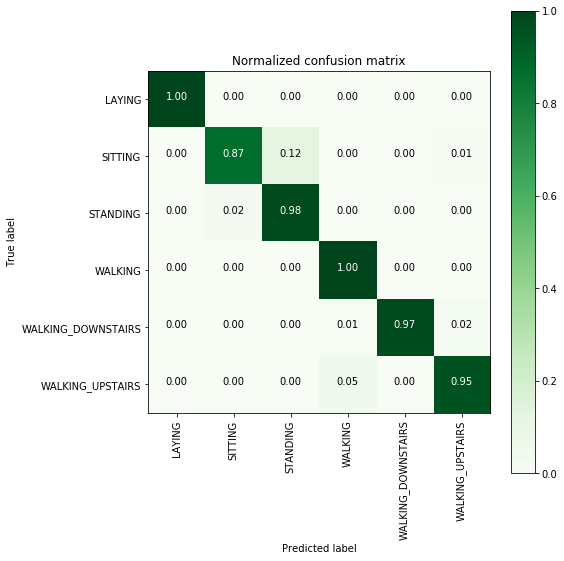

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [0]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


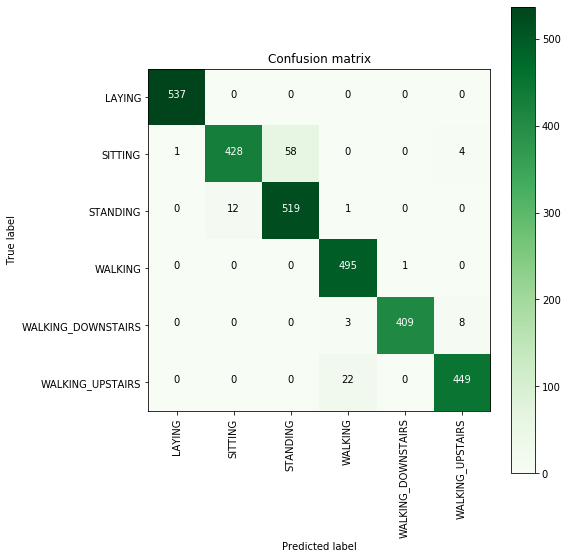

In [0]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [0]:
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



**2. Linear SVC with GridSearch**

In [0]:
from sklearn.svm import LinearSVC

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.4s finished


Done 
 

---------------------
|      Accuracy      |
---------------------

    0.9687818120122158


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  5 447  34   0   0   5]
 [  0  26 505   1   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  12   1 458]]


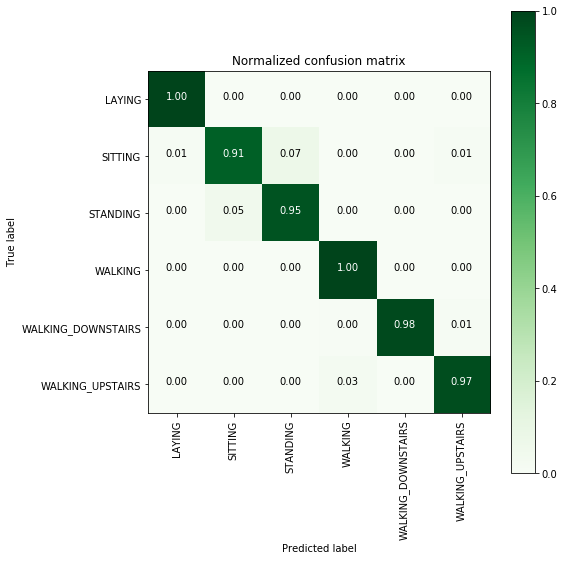

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.95      0.91      0.93       491
          STANDING       0.94      0.95      0.94       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

**3. Kernel SVM with GridSearch**

Done 
 

---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


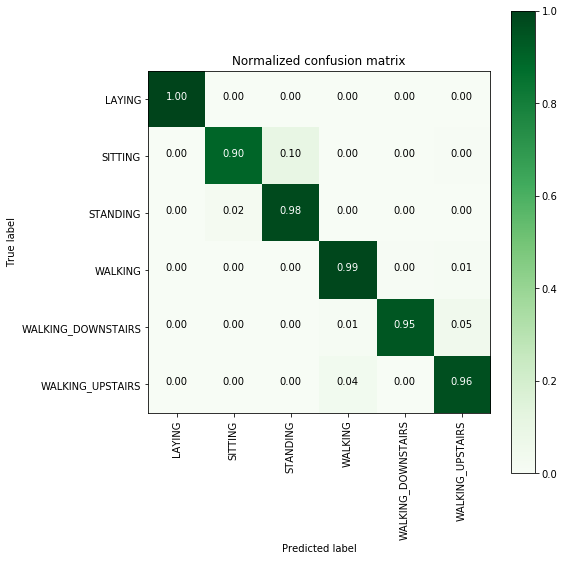

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [0]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

**4. Decision Trees with GridSearchCV**

Done 
 

---------------------
|      Accuracy      |
---------------------

    0.8646080760095012


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  13 346  61]
 [  0   0   0  78  24 369]]


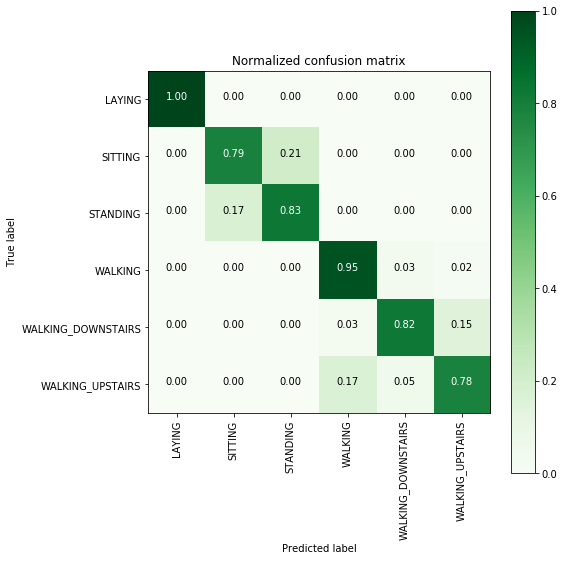

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.82      0.86       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       mi

In [0]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

**5. Random Forest Classifier with GridSearch**

Done 
 

---------------------
|      Accuracy      |
---------------------

    0.9100780454699695


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 411  80   0   0   0]
 [  0  47 485   0   0   0]
 [  0   0   0 483  10   3]
 [  0   0   0  34 336  50]
 [  0   0   0  35   6 430]]


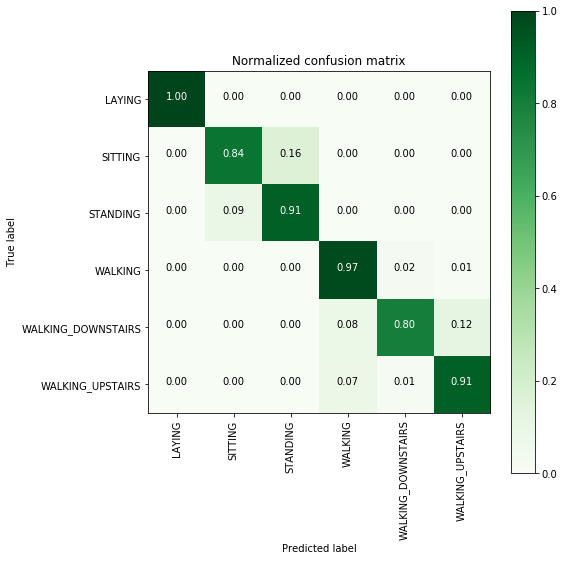

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.84      0.87       491
          STANDING       0.86      0.91      0.88       532
           WALKING       0.88      0.97      0.92       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.89      0.91      0.90       471

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
       

In [0]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

**6. Gradient Boosted Decision Trees With GridSearch**

Done 
 

---------------------
|      Accuracy      |
---------------------

    0.9236511706820495


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 402  87   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 481   7   8]
 [  0   0   0   8 371  41]
 [  0   1   0  29   5 436]]


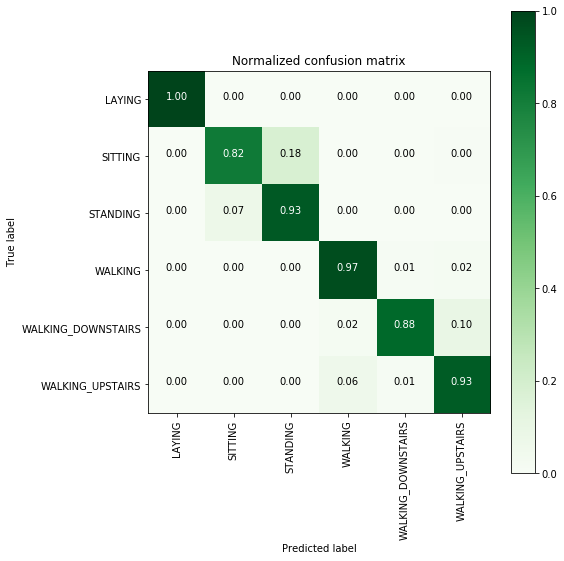

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.82      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.88      0.92       420
  WALKING_UPSTAIRS       0.90      0.93      0.91       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           mi

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

In [0]:
#Comparing all Models
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%      3.733%
Linear SVC          : 96.88%      3.122% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.46%      13.54% 
Random Forest       : 91.01%      8.992% 
GradientBoosting DT : 91.01%      8.992% 


**Conclusion :**
" In real world Domain knowledge,EDA and Feature engineering matters most to the one who solves. Improving performance is the only thing which actually matters to everyone else."




*   561 features can be reduced to a set of 37 features with simple featuring engineering from domain knowledge.
*   Simple feature engineering can classify the activites with 89% accuracy(Random forests with reduced features).
*Logistic Regression and Linear SVC are better classifiers in classifying the Activities (96% accuracy).
*Hyperplane is the apt decision boundary in classifying the activities.
Performance is further increased to 97% using joint features.



